In [111]:
# Variáveis Iniciais do Sistema
initial_date = "01-01-2020"
end_date = "31-12-2020"
total_registers = 900
total_users = 1200
total_locations = 5

initial_time = "08:00"
end_time = "23:00"

# Dois tipos de veiculos -> 90% serao carros e 10% serao bicicletas.
use_type = False
vehicle_types = { 'car': 0.9, 'bike': 0.1 }

# Dois tipos de clima -> em dias de chuva tem aumento de 50% na demanda comum.
use_weather = False
impact_weather = { 'sunny': { 'impact': 0, 'chance': 0.95 }, 'rain': { 'impact': 0.5, 'chance': 0.05 } }

# Definir todas as datas como feriado ou nao -> em dias de feriado tem diminuiçãod e 35% na demanda comum.
use_holiday = False
impact_holiday = -0.35
holidays = ["25-12","31-12"]

In [112]:
# Importações de Bibliotecas Necessárias
import pandas as pd
import numpy as np

from datetime import datetime
from datetime import timedelta  

from random import seed
from random import randint

from matplotlib import pyplot as plt
import matplotlib.dates as md

In [113]:
#cols = ["date","distanceRange","locationWeight","maxPrice","parking","parkingName","priceWeight",
#        "region","spotWanted","timeFrom","timeTo","vehicleId","vehicleType"]

cols = ["timeFrom", "timeTo"]

open_time = datetime.strptime(initial_time, '%H:%M')
close_time = datetime.strptime(end_time, '%H:%M')

date = datetime.strptime(initial_date, '%d-%m-%Y')
date = date.replace(hour=open_time.hour, minute=open_time.minute)

end_date = datetime.strptime(end_date, '%d-%m-%Y')

current_parking = []

date

datetime.datetime(2020, 1, 1, 8, 0)

In [114]:
df = pd.DataFrame(columns=cols)

print("Generating Data...")

while(date < end_date):
    
    # Cria uma ROW
    data = {}
    data.update({'timeFrom': date.strftime('%d-%m-%Y %H:%M')})
    
    # Trecho que define o tempo de estacionamento e captura dados do usuario
    # ------
    
    parking_time = randint(15,160)
    validate_date = date + timedelta(minutes=parking_time)
    
    if (validate_date.hour >= close_time.hour):
        data.update({'timeTo': (date.replace(hour=close_time.hour, minute=close_time.minute).strftime('%d-%m-%Y %H:%M')) })

    elif (validate_date.hour < open_time.hour):
        data.update({'timeTo': (date.replace(hour=close_time.hour, minute=close_time.minute).strftime('%d-%m-%Y %H:%M')) })
        
    else:
        data.update({'timeTo': validate_date.strftime('%d-%m-%Y %H:%M')})
       
    # ------
    
    df = df.append(data, ignore_index=True)
    
    
    # 20% chance de adicionar minutos
    isAddMin = randint(0,5)
    if (isAddMin >= 4):
        addMin = randint(1, 15)
        date = date + timedelta(minutes=addMin)
        
        if (date.hour >= close_time.hour):
            date = date + timedelta(days=1)
            date = date.replace(hour=open_time.hour, minute=open_time.minute)
        elif( (date.hour == close_time.hour-1) and (60 - date.minute <= 15)):
            date = date + timedelta(days=1)
            date = date.replace(hour=open_time.hour, minute=open_time.minute)
        elif (date.hour < open_time.hour):
            date = date.replace(hour=open_time.hour, minute=open_time.minute)
    
print("Done!")

Generating Data...
Done!


In [115]:
df

,timeFrom,timeTo
0,01-01-2020 08:00,01-01-2020 08:31
1,01-01-2020 08:00,01-01-2020 10:19
2,01-01-2020 08:00,01-01-2020 08:19
3,01-01-2020 08:00,01-01-2020 08:27
4,01-01-2020 08:09,01-01-2020 10:49
...,...,...
120937,30-12-2020 22:16,30-12-2020 23:00
120938,30-12-2020 22:30,30-12-2020 22:55
120939,30-12-2020 22:30,30-12-2020 23:00
120940,30-12-2020 22:43,30-12-2020 23:00


In [116]:
print("Writing output file...")
df.to_csv('generated_dataset.csv', index=False)
print("Done!")

Writing output file...
Done!


In [117]:
print("Reading CSV...")
df = pd.read_csv('generated_dataset.csv')
df = df.drop('timeTo',axis=1)

print("Setting the Pattern in DateTime Columns...")
df['timeFrom'] = pd.to_datetime(df['timeFrom'], errors='ignore')
df['timeFrom'] = pd.to_datetime(df["timeFrom"].dt.strftime('%d-%m-%Y %H:%M'))

print("Done!")

df

Reading CSV...
Setting the Pattern in DateTime Columns...
Done!


,timeFrom
0,2020-01-01 08:00:00
1,2020-01-01 08:00:00
2,2020-01-01 08:00:00
3,2020-01-01 08:00:00
4,2020-01-01 08:09:00
...,...
120937,2020-12-30 22:16:00
120938,2020-12-30 22:30:00
120939,2020-12-30 22:30:00
120940,2020-12-30 22:43:00


In [118]:
df1 = df.copy()

print("Setting the Pattern in DateTime Columns...")
df1['timeFrom'] = pd.to_datetime(df1['timeFrom'], errors='ignore')

print("Grouping by Day...")
df1 = df1.groupby(df1['timeFrom'].dt.date).size().reset_index(name='TotalParkings')

print("Done!")
df1

Setting the Pattern in DateTime Columns...
Grouping by Day...
Done!


,timeFrom,TotalParkings
0,2020-01-01,334
1,2020-01-02,310
2,2020-01-03,343
3,2020-01-04,380
4,2020-01-05,288
...,...,...
360,2020-12-26,328
361,2020-12-27,304
362,2020-12-28,384
363,2020-12-29,337


In [119]:
df2 = df1.copy()
print("Setting the Pattern in DateTime Columns...")
df2['timeFrom'] = pd.to_datetime(df2['timeFrom'], errors='ignore')

# https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#offset-aliases
print("Grouping by Month")
df2 = df2.groupby(pd.Grouper(freq='M', key='timeFrom')).sum().reset_index()

print("Done!")
df2

Setting the Pattern in DateTime Columns...
Grouping by Month
Done!


,timeFrom,TotalParkings
0,2020-01-31,10235
1,2020-02-29,9593
2,2020-03-31,10198
3,2020-04-30,10213
4,2020-05-31,10091
5,2020-06-30,9942
6,2020-07-31,10306
7,2020-08-31,10139
8,2020-09-30,10173
9,2020-10-31,10224


Grouping by Month


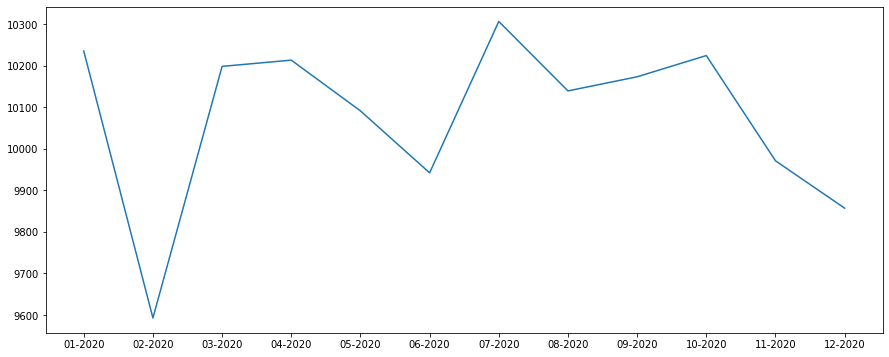

In [122]:
df3 = df2.copy()

print("Grouping by Month")
#df2 = df2.groupby(df2.timeFrom.dt.to_period("M"))['TotalParkings'].sum().reset_index(name='TotalParkings')
#df2 = df2.groupby(pd.Grouper(freq='M', key='timeFrom')).sum().reset_index()

df3['timeFrom'] = df3['timeFrom'].dt.strftime('%m-%Y')
df3 = df3.set_index('timeFrom')

plt.subplots(figsize=(15,6))
plt.title("\nTotal: "+str(len(df['timeTo'])), fontsize=30, pad=20)
plt.xlabel("Enter DateTime", fontsize=20, labelpad=20)
plt.ylabel("Exit DateTime", fontsize=20, labelpad=20)
plt.plot(df3)

In [ ]:
print("Setting the Pattern in DateTime Columns...")
df['timeFrom'] = pd.to_datetime(df['timeFrom'], errors='ignore')
df['timeFrom'] = pd.to_datetime(df["timeFrom"].dt.strftime('%d/%m/%Y %H:%M'))

df['timeTo'] = pd.to_datetime(df['timeTo'], errors='ignore')
df['timeTo'] = pd.to_datetime(df["timeTo"].dt.strftime('%d/%m/%Y %H:%M'))

# Query For Specific Day
print("Setting Query for Specific Day and Month...")
df = df[(df['timeFrom'].dt.month == 2) & (df['timeFrom'].dt.day == 20)]

print("Generating Graph...")
fig, ax = plt.subplots(figsize=(15,15))

#min_y = 0
max_y = 0
#max_x = 0
min_x = 0

#while ((df['timeTo'].min().minute - min_y) % 30 != 0):
#    min_y -= 1
    
while ((df['timeTo'].max().minute + max_y) % 30 != 0):
    max_y += 1
    
while ((df['timeFrom'].min().minute + min_x) % 30 != 0):
    min_x -= 1

min_x = min_x + 30
max_y = max_y + 30
    
#while ((df['timeFrom'].max().minute + max_x) % 30 != 0):
#    max_x += 1
    
    
plt.scatter(x=df['timeFrom'], y=df['timeTo'])

ax.set_xlim(df['timeFrom'].min()-pd.Timedelta(min_x,'m'),
            df['timeTo'].max()+pd.Timedelta(max_y,'m'))

ax.set_ylim(df['timeFrom'].min()-pd.Timedelta(min_x,'m'),
            df['timeTo'].max()+pd.Timedelta(max_y,'m'))

ax.xaxis.set_major_locator(md.MinuteLocator(interval = 30))
ax.xaxis.set_major_formatter(md.DateFormatter('%H:%M'))

ax.yaxis.set_major_locator(md.MinuteLocator(interval = 30))
ax.yaxis.set_major_formatter(md.DateFormatter('%H:%M'))

fig.autofmt_xdate()

plt.title("\nTotal: "+str(len(df['timeTo'])), fontsize=30, pad=20)
plt.xlabel("Enter DateTime", fontsize=20, labelpad=20)
plt.ylabel("Exit DateTime", fontsize=20, labelpad=20)

plt.xticks(rotation=90)

plt.grid()
plt.show()